# Analysis

This notebook includes the analysis of bike rentals and accidents in NYC, 2023 based on data provided from Citibike and NYPD.

## 1 Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2 Import and prepare data

### 2.1 Citibike data

If not already done, run ```2_scripts/0_preprocess-data.py``` first.

In [ ]:
# Load preprocessed data
df_c = pd.read_csv("../0_data/_preprocessed-data/citibike_2023.csv")

df_c.head()

### 2.2 Police data

## 3 Initial analysis of Citibike data 
...with focus on characteristics in time

### 3.1 Most rides by Citibike members

In [5]:
# Calculate key total numbers from data set

# total number of rides
tot_rides = len(df_c)

# total number of rides by bike type
tot_rideable_type = df_c.value_counts("rideable_type")
# total number of rides by electric bike
tot_rides_electric_bike = tot_rideable_type.iloc[0]
# total number of rides by classic bike
tot_rides_classic_bike = tot_rideable_type.iloc[1]

# total number of rides by members or non-members (casuals)
tot_member_casual = df_c.value_counts("member_casual")
# total number of rides by members
tot_rides_member = tot_member_casual.iloc[0]
# total number of rides by non-members (casuals)
tot_rides_casual = tot_member_casual.iloc[1]

# Initiate dataframe to store all total values for analysis report
df_analysis_tot = pd.DataFrame({
    "metric": [
        "tot_rides",
        "tot_rides_electric_bike",
        "tot_rides_classic_bike",
        "tot_rides_member",
        "tot_rides_casual"
    ],
    "value": [
        tot_rides,
        tot_rides_electric_bike,
        tot_rides_classic_bike,
        tot_rides_member,
        tot_rides_casual
    ]
})

In [6]:
# Calculate key share numbers from data set

# Share of electric bike rides
share_rides_electric_bike = tot_rides_electric_bike / tot_rides
# Share of classic bike rides
share_rides_classic_bike = 1 - share_rides_electric_bike 
# Share of member rides
share_rides_member = tot_rides_member / tot_rides
# Share of casual rides (non-members)
share_rides_casual = 1 - share_rides_member

# Initiate dataframe to store all share values for analysis report
df_analysis_share = pd.DataFrame({
    "metric": [
        "share_rides_electric_bike",
        "share_rides_classic_bike",
        "share_rides_member",
        "share_rides_casual"
    ],
    "value": [
        share_rides_electric_bike,
        share_rides_classic_bike,
        share_rides_member,
        share_rides_casual
    ]
})

In [7]:
df_analysis_tot

,metric,value
0,tot_rides,35106986
1,tot_rides_electric_bike,17605824
2,tot_rides_classic_bike,17501162
3,tot_rides_member,28513791
4,tot_rides_casual,6593195


In [8]:
df_analysis_share

,metric,value
0,share_rides_electric_bike,0.501491
1,share_rides_classic_bike,0.498509
2,share_rides_member,0.812197
3,share_rides_casual,0.187803


### First interpretation
1. Main categories in rides are a) bike type: electric vs. classical bike b) membership: member vs. non-member (casual) user
2. Nearly 50-50 rides with electric vs. classical bike
3. More member bike rides, than casual (non-member) bike rides (Probably members = commuters/locals, to be checked in 3.3)

### Implications for insurance
1. Members are main group to insure, since they make up most of the rides
2. Consider different insurance package for bikes vs. classical bikes, because electrical bikes are faster than classical bikes, and potentially lead to longer rides
3. Consider different insurance package for members vs. non-members, because of frequency/share of rides

### 3.2 Most bike rides in summer

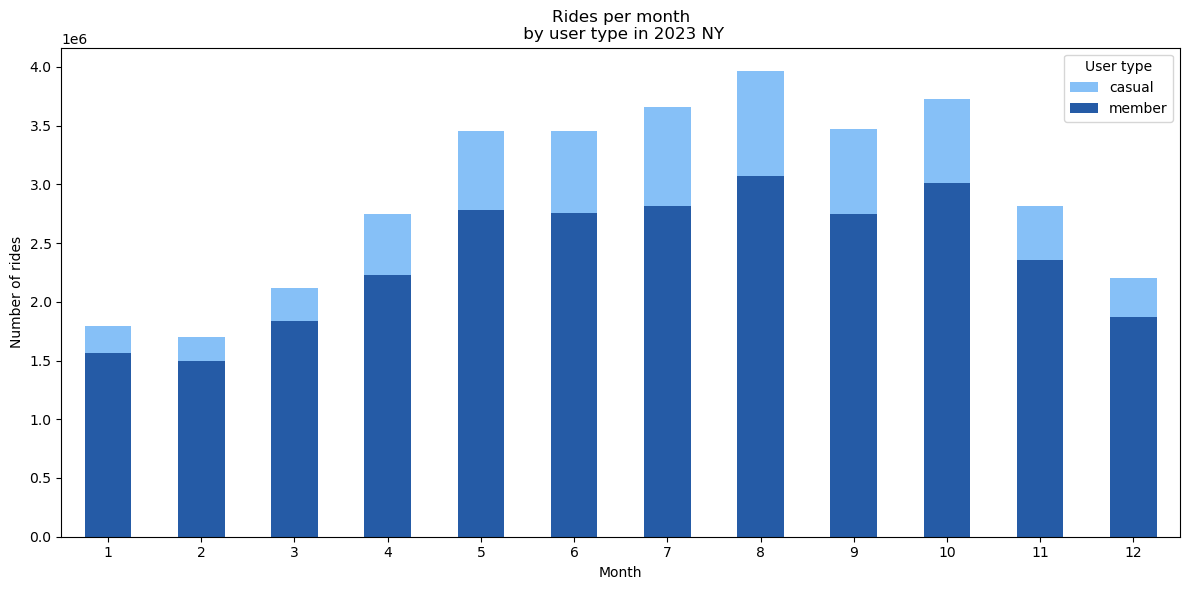

In [15]:
# Group by month and user type
rides_per_month = df_c.groupby(["month", "member_casual"]).size().unstack(fill_value=0)

# Reorder columns so 'member' comes first (bottom) and 'casual' second (top)
rides_per_month = rides_per_month[["member", "casual"]]

# Plot stacked bar chart
rides_per_month.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color={"casual": "#86C0F7", "member": "#255BA6"}
)

# Set legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title="User type")

plt.xlabel("Month")
plt.ylabel("Number of rides")
plt.title("Rides per month\n by user type in 2023 NY")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

### First interpretation
1. More bike rides in summer, less in winter - both for members and non-members
2. Non-members are more seasonal than members (e.g., Non-members 200k in January --x4--> +800k in August, while members 1.5M in January --x2--> 3M in August)
3. Again, rides from members make up the majority of rides – at any time!

### Implications for insurance
1. Consider marketing of insurance during peak summer season
2. Consider different risk profile depending on season (winter = ice on the roads)

### 3.3 Members commute most during rush hours

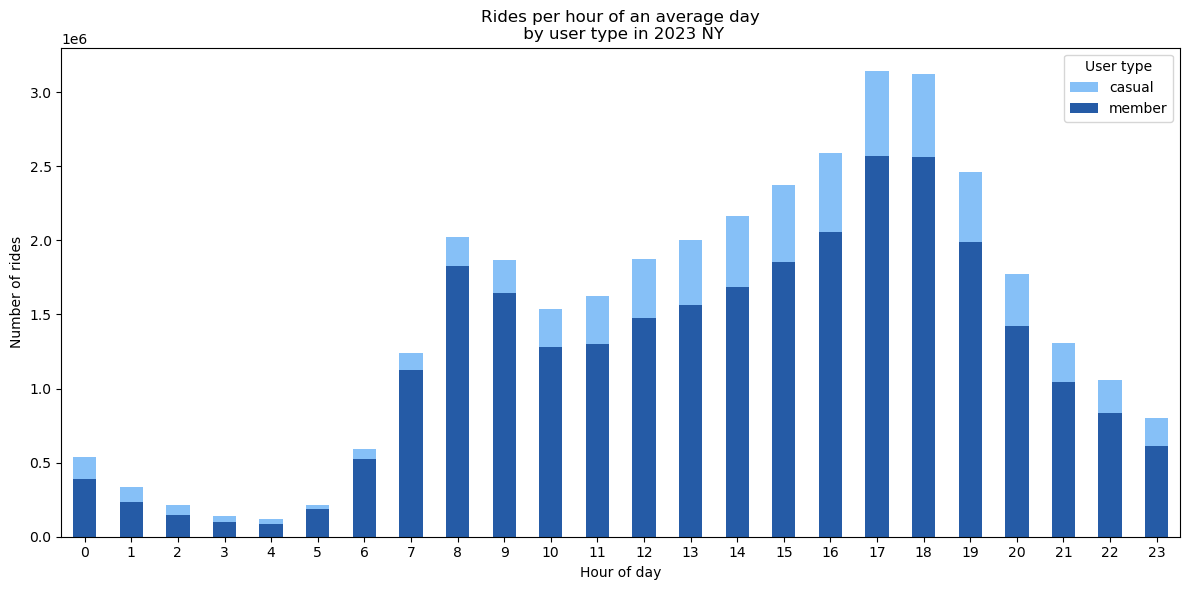

In [17]:
# Count rides per hour & user type
rides_per_hour = df_c.groupby(["hour", "member_casual"]).size().unstack(fill_value=0)

# Reorder columns so casual first, member second (legend order)
rides_per_hour = rides_per_hour[["member", "casual"]]

# Plot stacked bar chart
rides_per_hour.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color={"casual": "#86C0F7", "member": "#255BA6"}
)

# Set legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title="User type")

plt.xlabel("Hour of day")
plt.ylabel("Number of rides")
plt.title("Rides per hour of an average day\n by user type in 2023 NY")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### First interpretation
1. Reasonal assumption: Casual rides = mainly tourists, member rides = mainly locals aka commuters
2. Peaks in rides around 8am and 5pm dominated by members (the locals commuting to their job)

### Implications for insurance
1. Most bike rides by members around rush hours, means even more risk for traffic accidents, since also cars are on the road (to be checked with police data in 5)

## 4 Initial analysis of police data

## 5 Geo-spatial analysis of Citibike and police data